### Task 4: Non Linear Dataset

#### Importing libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures  # Import for feature transformation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

#### Loading datasets

In [22]:
# Read the dataset while skipping the first line (meta-information)
df = pd.read_csv("../Datasets/NonLinearDataset/NonLinearDataset.txt", sep=" ", header=None, skiprows=1)
df = df.iloc[:, :2]  # Select only the first two columns (features)

# Convert all values to numeric, coercing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

#### Dividing training and testing data

In [23]:
# Assign class labels based on the dataset structure
df['class'] = np.concatenate([np.zeros(500), np.ones(500), np.full(1000, 2)])

# Split the data into features (X) and labels (y)
X = df.iloc[:, :2].values  # First two columns as features
y = df['class'].values    # 'class' column as the target labels

# Cast y to integer type to ensure correct processing
y = y.astype(int)

# Perform stratified split to ensure class distribution is maintained
# This will split 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Debugging: print the class distribution in the training and testing sets
print("Class Distribution in Training Data:", np.bincount(y_train))
print("Class Distribution in Testing Data:", np.bincount(y_test))

# Transform features using PolynomialFeatures
poly = PolynomialFeatures(degree=3)  # Use polynomial features (degree 3, for example)
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)       # Transform testing data

Class Distribution in Training Data: [350 350 700]
Class Distribution in Testing Data: [150 150 300]


#### Perceptron classifier

Accuracy: 0.92
Precision per class: [0.87162162 0.88489209 0.95846645]
Recall per class: [0.86 0.82 1.  ]
F1 Score per class: [0.86577181 0.85121107 0.97879282]
Confusion Matrix:
 [[129  16   5]
 [ 19 123   8]
 [  0   0 300]]


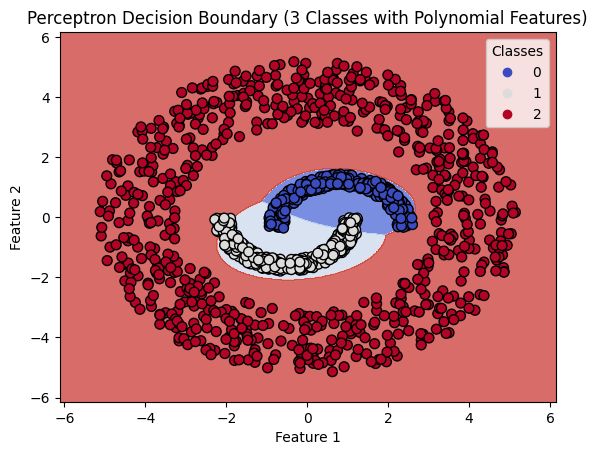

In [24]:
# Train the Perceptron model for 3-class classification (linear boundary in transformed space)
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Output the performance metrics
print("Accuracy:", accuracy)
print("Precision per class:", precision)
print("Recall per class:", recall)
print("F1 Score per class:", f1)
print("Confusion Matrix:\n", cm)

# Decision Boundary Plot for 3 classes (Using Perceptron with polynomial features)
def plot_decision_boundary(X, y, model, poly, title="Decision Boundary"):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Transform the grid points using the polynomial features
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(poly.transform(grid_points))  # Predict using transformed features
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Legend for the classes
    handles, labels = scatter.legend_elements()
    plt.legend(handles, labels, title="Classes")
    plt.show()

# Plotting decision boundary for Perceptron classifier with 3 classes and polynomial features
plot_decision_boundary(X_train, y_train, model, poly, title="Perceptron Decision Boundary (3 Classes with Polynomial Features)")
